In [132]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [134]:
import numpy as np
import pandas as pd
from numpy import loadtxt
from tensorflow import keras

The goal is to create 2 vectors $ x^{users} $ and $ x^{movie} $ specifif to the user and movie

The variables used here:
Y : Matrix Y $ ( n_m \times n_u ) $ contains the ratings $ y^{(i, j)} $  \\
R : matrix  𝑅 is an binary-valued indicator matrix, where  𝑅(𝑖,𝑗)=1 if user  𝑗 gave a rating to movie  𝑖, and  𝑅(𝑖,𝑗)=0 otherwise.  \\
X, W, b are the learning parameter

In [135]:
file = open('small_movies_X.csv', 'rb')
X = loadtxt(file, delimiter = ",")

In [136]:
file = open('small_movies_W.csv', 'rb')
W = loadtxt(file,delimiter = ",")

In [137]:
file = open('small_movies_b.csv', 'rb')
b = loadtxt(file,delimiter = ",")
b = b.reshape(-1, 1)

In [138]:
num_movies, num_features = X.shape
num_users, _ = W.shape

In [139]:
file = open('small_movies_Y.csv', 'rb')
Y = loadtxt(file, delimiter = ",")

file = open('small_movies_R.csv', 'rb')
R = loadtxt(file, delimiter = ",")

In [140]:
print("Y", Y.shape)
print("R", R.shape)
print("X", X.shape)
print("W", W.shape)
print("b", b.shape)
print("num_features", num_features)
print("num_movies",   num_movies)
print("num_users",    num_users)

Y (4778, 443)
R (4778, 443)
X (4778, 10)
W (443, 10)
b (443, 1)
num_features 10
num_movies 4778
num_users 443


In [141]:
#  From the matrix, we can compute statistics like average rating.
tsmean =  np.mean(Y[0, R[0, :].astype(bool)])
print(f"Average rating for movie 1 : {tsmean:0.3f} / 5" )

Average rating for movie 1 : 3.400 / 5


The collaborative filtering algorithm in the setting of movie recommendations considers a set of  𝑛-dimensional parameter vectors  $ 𝐱^{(0)},...,𝐱^{(𝑛_𝑚−1)}
 ,  𝐰^{(0)},...,𝐰^{(𝑛_𝑢−1)}
  and  𝑏^{(0)},...,𝑏^{(𝑛_𝑢−1)} $, where the model predicts the rating for movie  𝑖
  by user  𝑗
  as  $ 𝑦^{(𝑖,𝑗)}=𝐰^{(𝑗)}⋅𝐱^{(𝑖)}+𝑏^{(𝑗)}. $  \\
  Given a dataset that consists of a set of ratings produced by some users on some movies, you wish to learn the parameter vectors   $ 𝐱^{(0)},...,𝐱^{(𝑛_𝑚−1)}
 ,  𝐰^{(0)},...,𝐰^{(𝑛_𝑢−1)}
  and  𝑏^{(0)},...,𝑏^{(𝑛_𝑢−1)} $
  that produce the best fit.

In [142]:
# def cost_function(X, W, b, Y, R, lambda_factor):
#   n_m, n_u = Y.shape
#   J_cost = 0
#   for j in range(nu):
#         for i in range(nm):
#             J_cost += R[i, j]*(np.square(np.dot(W[j, :], X[i, :]) + b[0, j] - Y[i, j]))
#   J_cost = J_cost/2
#   J_cost += (lambda_factor_/2)*(np.sum(np.square(W))+np.sum(np.square(X)))

#   return J_cost

In [143]:
def cost_function(X, W, b, Y, R, lambda_factor):
    j = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y)*R
    J_cost = 0.5 * tf.reduce_sum(j**2) + (lambda_factor/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
    return J_cost

In [144]:
Y_ratings = pd.read_csv('small_movies_Y.csv')
Y_ratings.transpose()

,0,1,2,3,4,5,6,7,8,9,...,4767,4768,4769,4770,4771,4772,4773,4774,4775,4776
0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0.433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0.434,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0.435,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0.436,0.0,0.0,0.0,3.0,4.5,0.0,0.0,0.0,0.0,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
Y_ratings_transpose = Y_ratings.transpose()
Y_ratings_transpose.describe()

,0,1,2,3,4,5,6,7,8,9,...,4767,4768,4769,4770,4771,4772,4773,4774,4775,4776
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,...,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,0.044018,0.018059,0.018059,0.174944,0.409707,0.002257,0.221219,0.025959,0.021445,0.176072,...,0.010158,0.007901,0.006772,0.009029,0.009029,0.007901,0.009029,0.007901,0.007901,0.007901
std,0.390474,0.222367,0.211948,0.724790,1.263737,0.047511,0.839253,0.264624,0.273432,0.801252,...,0.213801,0.166290,0.142534,0.190046,0.190046,0.166290,0.190046,0.166290,0.166290,0.166290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,4.000000,3.000000,5.000000,5.000000,1.000000,4.500000,4.000000,4.500000,4.500000,...,4.500000,3.500000,3.000000,4.000000,4.000000,3.500000,4.000000,3.500000,3.500000,3.500000


In [146]:
movies = pd.read_csv('small_movie_list.csv')
movies.head()

,Unnamed: 0,mean rating,number of ratings,title
0,0,3.400000,5,"Yards, The (2000)"
1,1,3.250000,6,Next Friday (2000)
2,2,2.000000,4,Supernova (2000)
3,3,2.000000,4,Down to You (2000)
4,4,2.672414,29,Scream 3 (2000)


In [147]:
movies['mean rating']

0       3.400000
1       3.250000
2       2.000000
3       2.000000
4       2.672414
          ...   
4773    3.500000
4774    4.000000
4775    3.500000
4776    3.500000
4777    3.500000
Name: mean rating, Length: 4778, dtype: float64

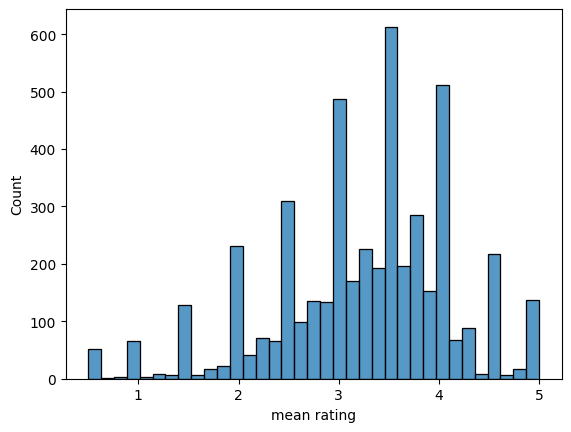

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
y_axis = movies['mean rating']
x_axis = np.arange(num_movies)
sns.histplot(y_axis)
plt.show()


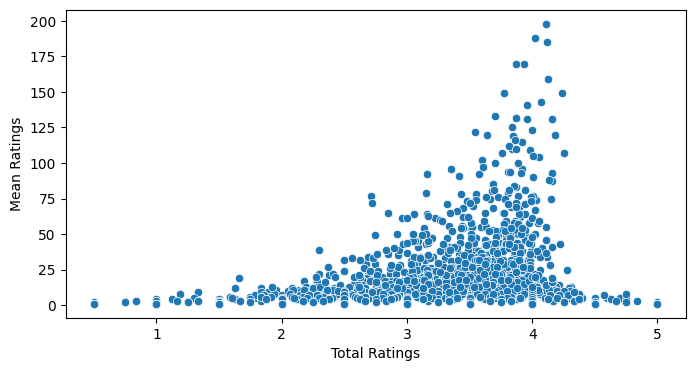

In [149]:
plt.figure(figsize=(8,4))
sns.scatterplot(y = movies['number of ratings'], x = movies['mean rating'])
plt.xlabel('Total Ratings')
plt.ylabel('Mean Ratings')
plt.show()

In [150]:
Rated = pd.read_csv('small_movies_R.csv')
Rated

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.428,0.429,0.430,0.431,0.432,0.433,0.434,0.435,0.436,0.437
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
# print(movies['title'][movies['index'] == 16].values())

In [152]:
def load_Movie_List_pd():
    df = pd.read_csv('small_movie_list.csv', header=0, index_col=0,  delimiter=',', quotechar='"')
    mlist = df["title"].to_list()
    return(mlist, df)

In [153]:
import random

In [154]:
movieList, movieList_df = load_Movie_List_pd()

my_ratings = np.zeros(num_movies)          #  Initialize my ratings

my_ratings[2700] = 5
my_ratings[2609] = 2;
my_ratings[929]  = 5
my_ratings[246]  = 5
my_ratings[2716] = 3
my_ratings[382]  = 2
my_ratings[366]  = 5
my_ratings[622]  = 5
my_ratings[988]  = 3
my_ratings[2925] = 1
my_ratings[2937] = 1
my_ratings[793]  = 5
for k in range(0, 4776, 100):
  my_ratings[k] = random.randint(1, 5)
my_rated = [i for i in range(len(my_ratings)) if my_ratings[i] > 0]

print('\nNew user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0 :
        print(f'Rated {my_ratings[i]} for  {movieList_df.loc[i,"title"]}');


New user ratings:

Rated 4.0 for  Yards, The (2000)
Rated 1.0 for  Art of War, The (2000)
Rated 4.0 for  3000 Miles to Graceland (2001)
Rated 5.0 for  Shrek (2001)
Rated 5.0 for  All Over the Guy (2001)
Rated 5.0 for  Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Rated 2.0 for  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Rated 5.0 for  I Am Sam (2001)
Rated 1.0 for  Undercover Brother (2002)
Rated 1.0 for  Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (2002)
Rated 5.0 for  Harry Potter and the Chamber of Secrets (2002)
Rated 2.0 for  Stone Reader (2002)
Rated 5.0 for  Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Rated 4.0 for  Johnny English (2003)
Rated 4.0 for  My Architect: A Son's Journey (2003)
Rated 5.0 for  Lord of the Rings: The Return of the King, The (2003)
Rated 3.0 for  Eternal Sunshine of the Spotless Mind (2004)
Rated 3.0 for  United States of Leland, The (2003)
Rated 4.0 for  Code 46 (2003)
Rated 

In [155]:
# Reload ratings
file = open('small_movies_Y.csv', 'rb')
Y = loadtxt(file, delimiter = ",")

file = open('small_movies_R.csv', 'rb')
R = loadtxt(file, delimiter = ",")

# Add new user ratings to Y
Y = np.c_[my_ratings, Y]

# Add new user indicator matrix to R
R = np.c_[(my_ratings != 0).astype(int), R]

# Normalize Y and R
Ymean = (np.sum(Y*R,axis=1)/(np.sum(R, axis=1)+1e-12)).reshape(-1,1)
Ynorm = Y - np.multiply(Ymean, R)

In [156]:
num_movies, num_users = Y.shape
num_features = 100

tf.random.set_seed(1234)
W = tf.Variable(tf.random.normal((num_users,  num_features),dtype=tf.float64),  name='W')
X = tf.Variable(tf.random.normal((num_movies, num_features),dtype=tf.float64),  name='X')
b = tf.Variable(tf.random.normal((1,          num_users),   dtype=tf.float64),  name='b')

# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=1e-1)

In [157]:
W

<tf.Variable 'W:0' shape=(444, 100) dtype=float64, numpy=
array([[-1.26502780e+00, -8.82660075e-01,  4.53257458e-01, ...,
         5.71714040e-01, -8.57282078e-02, -7.82600226e-01],
       [-1.40533838e+00, -1.05724543e+00,  3.69276661e-01, ...,
        -4.47408693e-01,  7.36982639e-01, -3.14246906e-01],
       [ 1.78576887e+00, -1.44474834e+00,  2.01221567e+00, ...,
         2.55026549e-01,  1.00099567e+00,  2.00222365e-01],
       ...,
       [-4.76682514e-04, -1.52804517e+00,  1.78850793e+00, ...,
        -4.80078643e-01,  1.54561724e+00, -4.21130087e-01],
       [-1.76589904e+00,  1.36847043e+00, -1.24869574e+00, ...,
        -1.03006837e-01, -7.88362685e-01,  2.42165876e-02],
       [ 1.67334361e+00,  6.09641721e-01, -1.46882914e-02, ...,
         3.23139088e-01, -1.35022669e+00, -8.19623317e-01]])>

In [158]:
X

<tf.Variable 'X:0' shape=(4778, 100) dtype=float64, numpy=
array([[ 0.92169644,  0.40301904, -0.67974247, ..., -0.80878489,
        -1.98176797,  1.12438997],
       [ 1.108574  ,  1.44503183,  0.42653148, ...,  0.16030169,
         0.75023781, -2.10539448],
       [ 0.68172499, -0.01864912,  0.37847319, ...,  0.48110345,
         1.82799953, -1.23496949],
       ...,
       [ 0.54173381, -0.60211394,  0.84311624, ...,  0.84381939,
        -0.18579388, -0.95618038],
       [ 0.05153298,  1.77964973,  1.41950432, ...,  1.35573809,
         0.75805492,  1.52470939],
       [-0.06101307,  1.04127983,  0.04409583, ..., -0.22361477,
         0.96576194,  0.57125988]])>

In [159]:
b

<tf.Variable 'b:0' shape=(1, 444) dtype=float64, numpy=
array([[-0.08194051,  0.7000041 , -0.98175261,  1.10141916, -0.49974704,
         0.39351135, -1.23614588,  0.99599781, -0.91513672,  0.31685958,
         0.47418537, -0.38766181, -0.66364006,  0.34178677, -0.30953542,
         2.30197844,  2.19730294, -0.58498967,  0.26631225,  1.63030408,
        -2.04239495,  0.39630212, -2.13983715,  3.33201036, -0.46764289,
        -0.15335556, -0.51456379, -0.58334794, -0.95389979, -0.41268613,
         0.84326297, -0.90365459, -1.11368457,  0.14639436,  1.17330207,
         1.26389855,  1.45581175, -0.45724971,  0.76289591, -0.17507672,
         0.42835664, -1.18268666, -0.40656716, -1.68187541,  3.96737893,
        -2.71427732,  0.31842615,  1.19225222,  1.16441078,  0.49310621,
         0.05172945,  0.85886458, -1.06175083,  0.0864987 ,  1.18688573,
         1.32847309, -0.63768585,  0.36481673,  1.01765262, -1.25631556,
        -0.14750861, -0.36233672, -0.81235216, -0.73540246, -0.33410

Let's now train the collaborative filtering model. This will learn the parameters $\mathbf{X}$, $\mathbf{W}$, and $\mathbf{b}$.

In [163]:
iterations = 400
lambda_factor = 1
for iter in range(iterations):
    with tf.GradientTape() as tape:
        cost_value = cost_function(X, W, b, Ynorm, R, lambda_factor)

    grads = tape.gradient( cost_value, [X,W,b] )

    optimizer.apply_gradients( zip(grads, [X,W,b]) )

    if iter % 50 == 0:
        print(f"Training loss at iteration {iter}: {cost_value:0.1f}")

Training loss at iteration 0: 2570.9
Training loss at iteration 50: 2152.3
Training loss at iteration 100: 1983.6
Training loss at iteration 150: 1903.4
Training loss at iteration 200: 1859.6
Training loss at iteration 250: 1833.2
Training loss at iteration 300: 1816.0
Training loss at iteration 350: 1804.1


To predict the rating of movie $i$ for user $j$, you compute $\mathbf{w}^{(j)} \cdot \mathbf{x}^{(i)} + b^{(j)}$. This can be computed for all ratings using matrix multiplication.

In [166]:
# Make a prediction using trained weights and biases
p = np.matmul(X.numpy(), np.transpose(W.numpy())) + b.numpy()

pm = p + Ymean

my_predictions = pm[:,0]

# sort predictions
sorted = tf.argsort(my_predictions, direction='DESCENDING')

for i in range(17):
    j = sorted[i]
    if j not in my_rated:
        print(f'Predicting rating {my_predictions[j]:0.2f} for movie {movieList[j]}')

print('\n\nOriginal vs Predicted ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(f'Original {my_ratings[i]}, Predicted {my_predictions[i]:0.2f} for {movieList[i]}')

Predicting rating 5.22 for movie Colourful (Karafuru) (2010)
Predicting rating 5.04 for movie Son of the Bride (Hijo de la novia, El) (2001)
Predicting rating 5.00 for movie Bossa Nova (2000)
Predicting rating 4.98 for movie Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)
Predicting rating 4.98 for movie Eichmann (2007)
Predicting rating 4.98 for movie Into the Abyss (2011)
Predicting rating 4.96 for movie Dragons: Gift of the Night Fury (2011)
Predicting rating 4.96 for movie Martin Lawrence Live: Runteldat (2002)
Predicting rating 4.94 for movie Particle Fever (2013)
Predicting rating 4.94 for movie Into the Forest of Fireflies' Light (2011)
Predicting rating 4.94 for movie One I Love, The (2014)
Predicting rating 4.94 for movie Laggies (2014)


Original vs Predicted ratings:

Original 4.0, Predicted 3.92 for Yards, The (2000)
Original 1.0, Predicted 1.09 for Art of War, The (2000)
Original 4.0, Predicted 3.88 for 3000 Miles to Graceland (2001)
Original 5.0, Predicted

In [167]:
filter=(movieList_df["number of ratings"] > 20)
movieList_df["pred"] = my_predictions
movieList_df = movieList_df.reindex(columns=["pred", "mean rating", "number of ratings", "title"])
movieList_df.loc[sorted[:4778]].loc[filter].sort_values("mean rating", ascending=False)

,pred,mean rating,number of ratings,title
4553,4.172130,4.280000,25,Logan (2017)
1743,4.159492,4.252336,107,"Departed, The (2006)"
2112,4.392238,4.238255,149,"Dark Knight, The (2008)"
5,3.791177,4.220930,43,"Boondock Saints, The (2000)"
382,2.108283,4.183333,120,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ..."
...,...,...,...,...
2297,2.557332,2.409091,22,Twilight (2008)
228,1.811753,2.380952,21,Joe Dirt (2001)
786,2.115016,2.370370,27,Charlie's Angels: Full Throttle (2003)
474,2.216163,2.295455,22,The Scorpion King (2002)
